In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sun Aug 16 17:10:53 2020

@author: wanxiang.shen@u.nus.edu
"""

import warnings, os
warnings.filterwarnings("ignore")


import pandas as pd
import numpy as np

from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score
from sklearn.metrics import auc as calculate_auc

import matplotlib.pyplot as plt
import seaborn as sns

from aggmap import AggMap, AggModel, loadmap
os.environ["CUDA_VISIBLE_DEVICES"]= '6'
np.random.seed(666) #just for reaptable results

In [2]:
df1 = pd.read_excel('./proteins_processed.xlsx', index_col = 0)
df2 = pd.read_excel('./Metabolites_processed.xlsx', index_col = 0)
df2 = df2.loc[df1.index]

df = df1.join(df2)
dfx = df[df.columns[2:]]
dfy = df[['Severe']]*1.

tr = df[df['Train_Test'] == 'Train'].index
ts = df[df['Train_Test'] == 'Test'].index


y = pd.get_dummies(dfy['Severe'])[[1,0]]

Y = y.loc[tr].values
X = dfx.loc[tr].values

In [3]:
from aggmap.aggmodel.xAI.perturb import GetGlobalIMP
from tensorflow.keras.models import load_model as load_tf_model


mp = loadmap('./results/COV-S.mp')
model = load_tf_model('./results/model.h55')

In [4]:
trainX = mp.batch_transform(X, scale_method = 'standard')

100%|##########| 31/31 [00:02<00:00, 11.62it/s]


In [5]:
arrX = trainX
dfY = pd.DataFrame(Y, columns = ['severe', 'non-severe'])
df_imp = GetGlobalIMP(model, mp, arrX, dfY, task_type = 'classification', apply_logrithm = False)


2021-07-30 18:43:34,979 - INFO - [bidd-aggmap] - generate file: ./feature points_1486_correlation_umap_mp
2021-07-30 18:43:35,011 - INFO - [bidd-aggmap] - save html file to ./feature points_1486_correlation_umap_mp


  0%|          | 0/1521 [00:00<?, ?it/s]

calculating feature importance for severe ...


  1%|1         | 21/1521 [00:00<00:11, 136.09it/s]

calculating feature importance for non-severe ...


100%|##########| 1521/1521 [00:11<00:00, 134.38it/s]


,x,y,v,Subtypes,colors,severe_importance,non-severe_importance
230,35,5,"sphingomyelin (d18:2/23:0, d18:1/23:1, d17:1/2...",cluster_02,#08ff00,4.921805,4.921805
1320,33,33,ergothioneine,cluster_03,#00fff6,4.562320,4.562320
308,35,7,"sphingomyelin (d18:1/20:1, d18:2/20:0)*",cluster_02,#08ff00,4.475332,4.475331
228,33,5,thyroxine,cluster_02,#08ff00,4.230328,4.230329
1244,35,31,N-acetyltryptophan,cluster_03,#00fff6,4.087976,4.087977
1242,33,31,1-carboxyethylleucine,cluster_03,#00fff6,3.861063,3.861063
464,35,11,1-(1-enyl-stearoyl)-2-arachidonoyl-GPE (P-18:0...,cluster_02,#08ff00,3.844796,3.844796
462,33,11,1-(1-enyl-stearoyl)-2-linoleoyl-GPE (P-18:0/18...,cluster_02,#08ff00,3.792399,3.792399
542,35,13,1-arachidonoyl-GPC* (20:4)*,cluster_02,#08ff00,3.717797,3.717798
512,5,13,Q6EMK4,cluster_05,#ee00ff,3.518565,3.518566


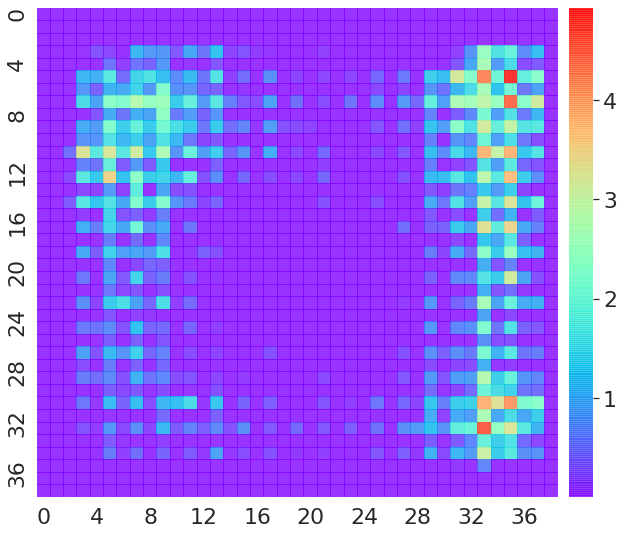

In [6]:
sns.set(style='white',  font='sans-serif', font_scale=2)
fig, ax  = plt.subplots(1, 1, figsize=(10, 9))

IMPM = df_imp['severe_importance'].values.reshape(*mp.fmap_shape)
sns.heatmap(IMPM,  
            cmap = 'rainbow', alpha = 0.8, xticklabels=4, ax =ax,
            yticklabels=4,  vmin = 0.002,
            cbar_kws = {'fraction':0.046, 'pad':0.02})

df_imp = df_imp.sort_values('severe_importance', ascending=False)
df_imp.to_csv('./results/feature_imp_test.csv')
df_imp.head(30)

## significant test

In [7]:
df_save = df_imp[['x', 'y', 'v', 'Subtypes', 'colors', 'severe_importance']]
df_save = df_save.set_index('v')

from scipy.stats import mannwhitneyu
p_values = []
for c in df_save.index:
    if c != 0:
        v1 = dfx[[c]]
        v2 = dfy[['Severe']]
        xx = v1.join(v2).groupby('Severe')[c].apply(lambda x:x.to_list())    
        s, p = mannwhitneyu(xx[0], xx[1], alternative='two-sided')
        p_values.append(p)
    else:
        p_values.append(None)
df_save['mannwhitneyu_p-value'] = p_values
df_save.index.name = 'feature points'

df_save.to_excel('./results/feature_importance.xlsx')

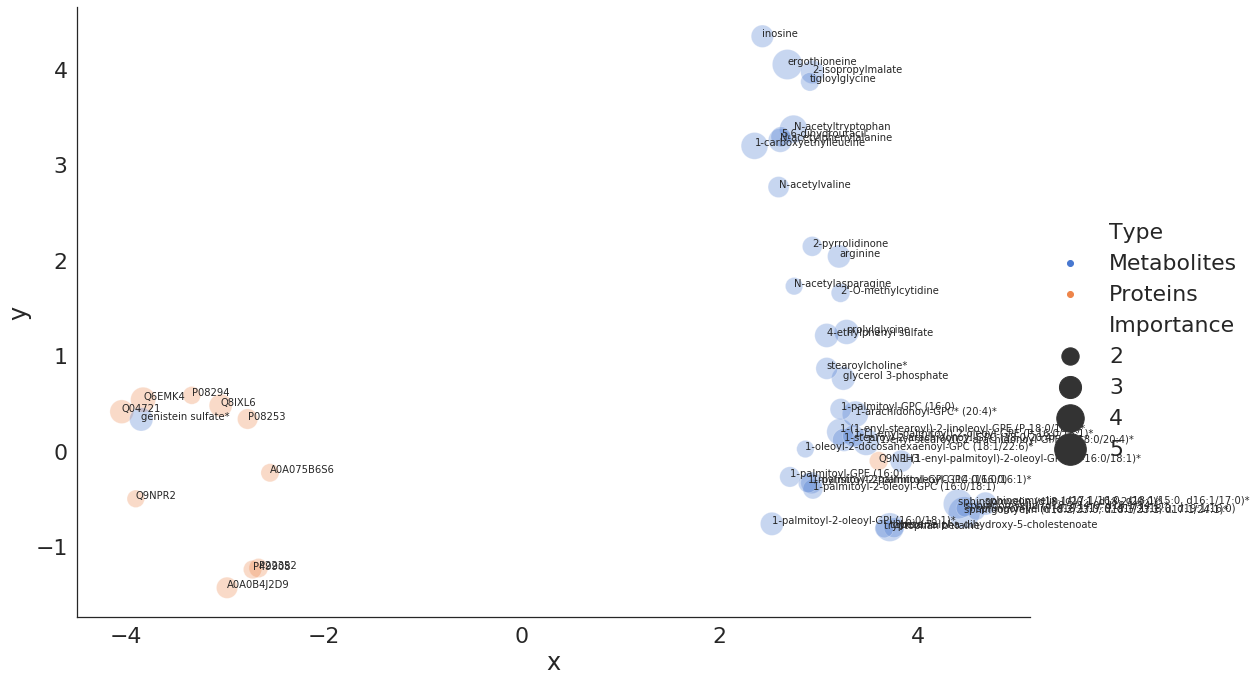

In [8]:
selected = df_imp.head(50) #df_imp[df_imp['severe_importance'] > 0.03]
select_markers = selected.v.tolist()

data = mp.df_scatter.set_index('IDs').loc[select_markers][['x', 'y']]
data = data.join(selected.set_index('v')['severe_importance'])
data['Type'] = data.index.isin(df2.columns)
data['Type'] =  data['Type'].map({True:'Metabolites', False:'Proteins'})
data['Importance'] = data['severe_importance']

# Plot miles per gallon against horsepower with other semantics
g = sns.relplot(x="x", y="y", size="Importance",   hue="Type", 
            sizes=(300, 1000), alpha=.3, palette="muted", height=10, aspect = 1.5,
             data=data)
#g.fig.set_size_inches(15,6)

for i in range(len(data)):
    ts = data.iloc[i]
    g.ax.text(ts.x, ts.y, ts.name, fontdict = {'fontsize':10})
    

#g.tight_layout()
g.savefig('./results/imp.pdf', bbox_inches='tight', dpi=400) 

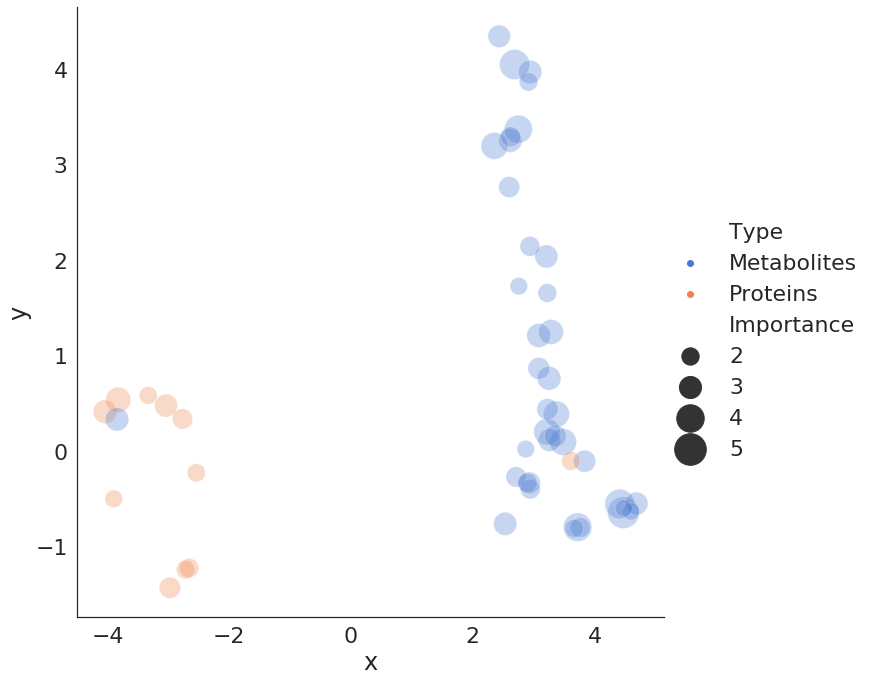

In [14]:
data.to_excel('./results/fig2.xlsx')
# Plot miles per gallon against horsepower with other semantics
g = sns.relplot(x="x", y="y", size="Importance",   hue="Type", 
            sizes=(300, 1000), alpha=.3, palette="muted", height=10, aspect = 1.0,
             data=data)
#g.fig.set_size_inches(15,6)

# for i in range(len(data)):
#     ts = data.iloc[i]
#     g.ax.text(ts.x, ts.y, ts.name, fontdict = {'fontsize':10})
    

#g.tight_layout()
g.savefig('./results/imp.pdf', bbox_inches='tight', dpi=400) 

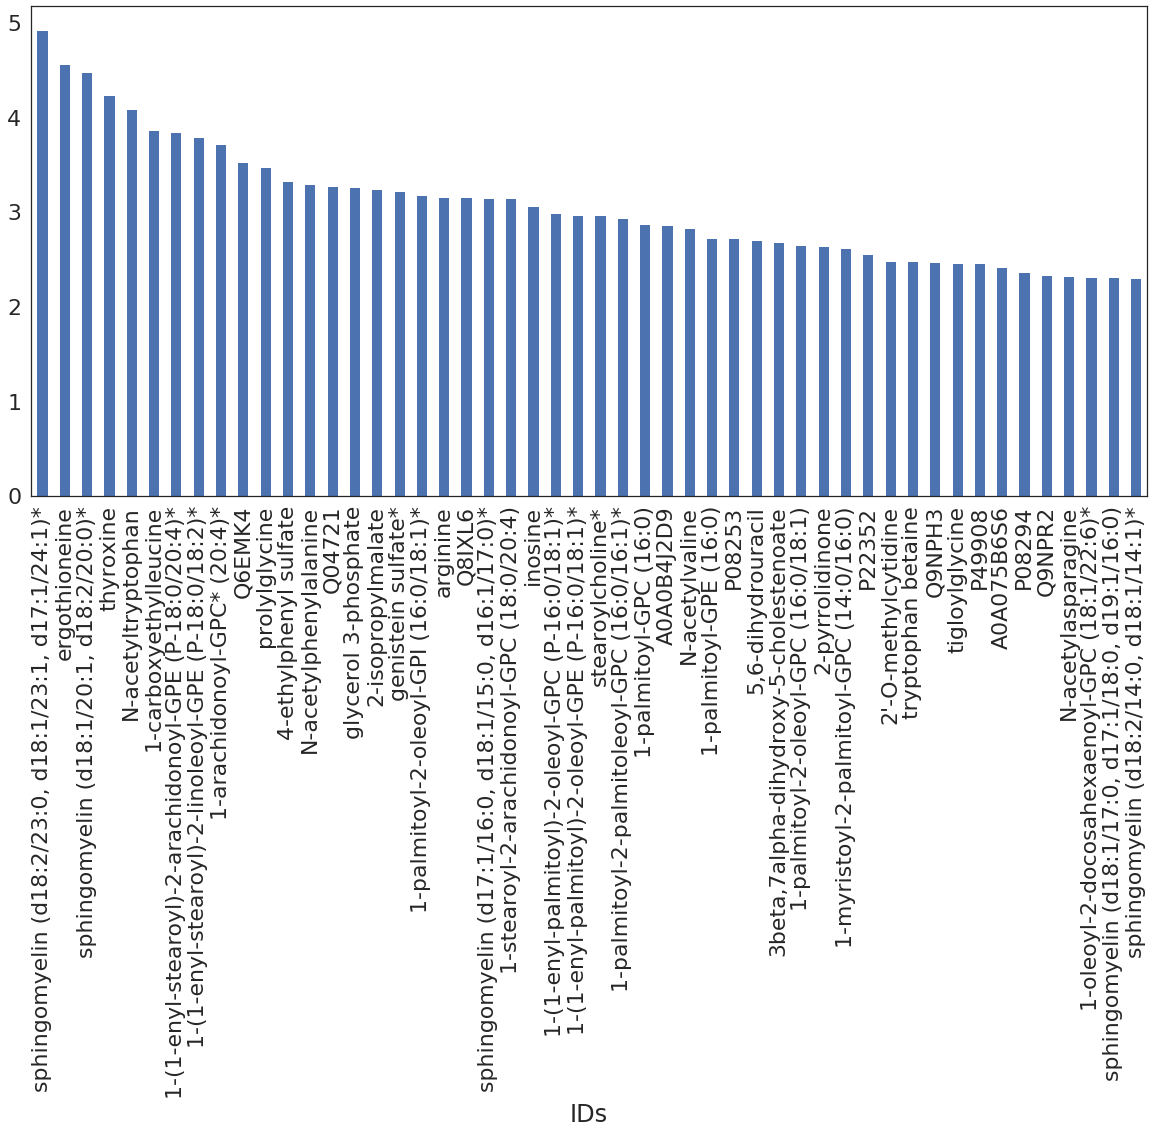

In [12]:
fig, ax  = plt.subplots(1, 1, figsize=(20, 9))
data['severe_importance'].plot(kind = 'bar')